In [6]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import gc
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pylab as py 
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from scipy.stats import norm

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
#df=pd.read_csv("D:/Sitanshu/Python/Twitter_Bot_Classification/finaldata.csv")
df=pd.read_csv("~/virtualenv/Twitter_Project/Twitter_Bot_Classification/finaldata.csv")
#df_1=pd.read_csv("D:/Sitanshu/Python/Twitter_Bot_Classification/model_data.csv")
df_1=pd.read_csv("~/virtualenv/Twitter_Project/Twitter_Bot_Classification/model_data.csv")
df_1 = df_1.drop('Unnamed: 0', axis =1)
df = df.drop(['Unnamed: 0', 'crawled_at', 'contributors_enabled','testset', 'random', 'default_profile_image', 'notifications', 'following', 'follow_request_sent', 'is_translator'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [ ]:
#if not using df_1 then uncomment

# manipulating target variable by putting 0 and 1 values
#df_model.loc[df["Category"] == 'genuine', "class"] = "0"
#df_model.loc[df["Category"] != 'genuine', "class"] = "1"

In [9]:
df_model = df[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'timestamp']]

##### Ignore warning should be implemented or not?

In [10]:
df_model['description_present'] = df_1['description_presence']
df_model['age'] = df_1['age']

<ipython-input-10-8c354fdfc8fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['description_present'] = df_1['description_presence']
<ipython-input-10-8c354fdfc8fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['age'] = df_1['age']


In [ ]:
#dropping column with description as we are not working on language and text recognition for the model.
#df = df.drop(['description'], axis = 1)

In [11]:
df['geo_enabled'] = df['geo_enabled'].fillna(0)

In [12]:
df['geo_enabled'].value_counts()

0.0    7723
1.0    3294
Name: geo_enabled, dtype: int64

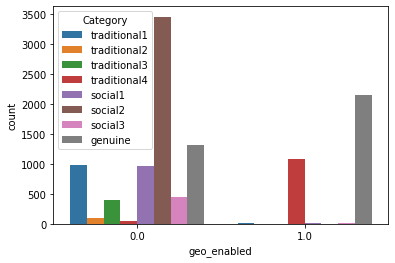

In [13]:
fig_1 = sns.countplot(x = 'geo_enabled', data = df, hue = "Category")

In [14]:
df_model['geo_enabled'] = df['geo_enabled']

<ipython-input-14-b0e292c13f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['geo_enabled'] = df['geo_enabled']


In [15]:
df['default_profile'].value_counts()

1.0    1477
Name: default_profile, dtype: int64

In [16]:
df['default_profile'] = df['default_profile'].fillna(0)

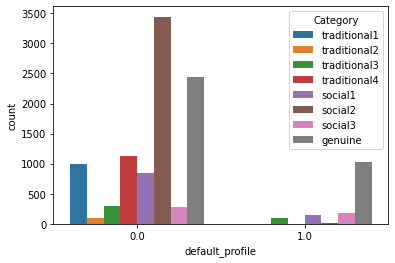

In [17]:
fig_1 = sns.countplot(x = 'default_profile', data = df, hue = "Category")

In [18]:
df_model['default_profile'] = df['default_profile']

<ipython-input-18-4ecd5d99100a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['default_profile'] = df['default_profile']


In [19]:
df_model.shape

(11017, 10)

In [20]:
df['geo_enabled'].value_counts()

0.0    7723
1.0    3294
Name: geo_enabled, dtype: int64

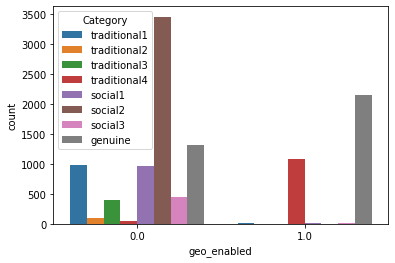

In [21]:
fig_1 = sns.countplot(x = 'geo_enabled', data = df, hue = "Category")

In [22]:
df_model['geo_enabled'] = df['geo_enabled']

<ipython-input-22-b0e292c13f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['geo_enabled'] = df['geo_enabled']


In [23]:
df_model['geo_enabled'].value_counts()

0.0    7723
1.0    3294
Name: geo_enabled, dtype: int64

In [24]:
df_model.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,timestamp,description_present,age,geo_enabled,default_profile
0,1259,837,1978,3200,9,2007-07-04 14:30:03,1,14,0.0,0.0
1,770,3274,3595,8,22,2007-07-26 11:07:31,1,14,0.0,0.0
2,1100,38849,34504,41,1014,2007-10-18 18:36:00,1,14,0.0,0.0
3,6497,5902,5496,0,82,2007-12-02 17:53:26,1,14,0.0,0.0
4,3203,2570,2638,0,5,2008-04-30 08:22:14,1,13,0.0,0.0


In [25]:
df_model['id'] = df['id'] 

<ipython-input-25-5e4256e9cade>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['id'] = df['id']


In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11017 non-null  int64  
 1   name                      11016 non-null  object 
 2   screen_name               11017 non-null  object 
 3   statuses_count            11017 non-null  int64  
 4   followers_count           11017 non-null  int64  
 5   friends_count             11017 non-null  int64  
 6   favourites_count          11017 non-null  int64  
 7   listed_count              11017 non-null  int64  
 8   protected                 11017 non-null  int64  
 9   verified                  11017 non-null  int64  
 10  language = en             11017 non-null  int64  
 11  less than 50 tweets       11017 non-null  int64  
 12  contains_url              11017 non-null  int64  
 13  friends follower ratio    11017 non-null  float64
 14  absenc

In [21]:
df_model['id'] = df['id']
df_model['description_present'] = df_1['description_presence']
df_model['class'] = df_1['class']
df_model['verified'] = df_1['verified']
df_model['protected'] = df_1['protected']


<ipython-input-21-f3ded082cc20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['id'] = df['id']
<ipython-input-21-f3ded082cc20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['description_present'] = df_1['description_presence']
<ipython-input-21-f3ded082cc20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [27]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   statuses_count       11017 non-null  int64  
 1   followers_count      11017 non-null  int64  
 2   friends_count        11017 non-null  int64  
 3   favourites_count     11017 non-null  int64  
 4   listed_count         11017 non-null  int64  
 5   timestamp            11017 non-null  object 
 6   description_present  11017 non-null  int64  
 7   age                  11017 non-null  int64  
 8   geo_enabled          11017 non-null  float64
 9   default_profile      11017 non-null  float64
 10  id                   11017 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 946.9+ KB


In [28]:
df_model.drop('timestamp', axis = 1, inplace = True)

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
df['url'] = df['url'].fillna(0)

In [30]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["url"] == 0, "url_present"] = "0"
df.loc[df["url"] != 0, "url_present"] = "1"

In [31]:
df['url_present'].value_counts()

0    7509
1    3508
Name: url_present, dtype: int64

In [32]:
df_model['url_present'] = df['url_present']

<ipython-input-32-606b9c537474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['url_present'] = df['url_present']


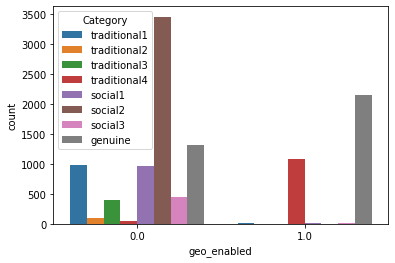

In [33]:
fig_1 = sns.countplot(x = 'geo_enabled', data = df, hue = "Category")

In [35]:
df_model['class'] = df_1['class']

<ipython-input-35-bf0a53c45170>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['class'] = df_1['class']


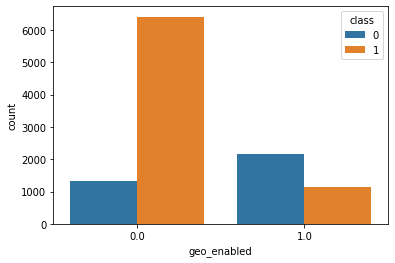

In [36]:
fig_1 = sns.countplot(x = 'geo_enabled', data = df_model, hue = "class")

In [ ]:
#df_model['url_present'].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 11017 non-null  object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   statuses_count       11017 non-null  int64  
 1   followers_count      11017 non-null  int64  
 2   friends_count        11017 non-null  int64  
 3   favourites_count     11017 non-null  int64  
 4   listed_count         11017 non-null  int64  
 5   description_present  11017 non-null  int64  
 6   age                  11017 non-null  int64  
 7   geo_enabled          11017 non-null  float64
 8   default_profile      11017 non-null  float64
 9   id                   11017 non-null  int64  
 10  url_present          11017 non-null  object 
 11  class                11017 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 1.0+ MB


In [39]:
df['profile_use_background_image'] = df['profile_use_background_image'].fillna(0)

In [40]:
df_model['profile_use_background_image'] = df['profile_use_background_image']

<ipython-input-40-11e19398f81c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['profile_use_background_image'] = df['profile_use_background_image']


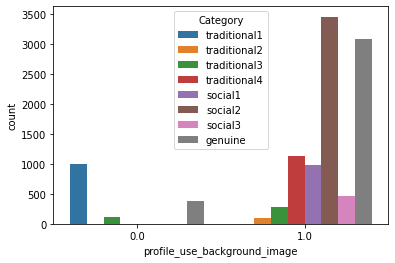

In [38]:
fig_1 = sns.countplot(x = 'profile_use_background_image', data = df, hue = 'Category')

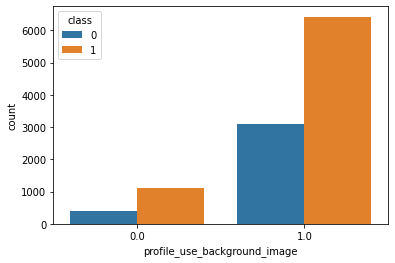

In [41]:
fig_1 = sns.countplot(x = 'profile_use_background_image', data = df_model, hue = 'class')

In [42]:
print(df['profile_background_color'].value_counts())

0000FF    3499
C0DEED    1837
253956    1125
131516     496
000000     427
          ... 
181818       1
1E87BB       1
082330       1
010A09       1
C7C263       1
Name: profile_background_color, Length: 532, dtype: int64


In [43]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["profile_background_color"] == '0000FF', "background_color_class"] = "0000FF"
df.loc[df["profile_background_color"] == 'C0DEED', "background_color_class"] = "C0DEED"
df.loc[df["profile_background_color"] == '131516', "background_color_class"] = "131516"
df.loc[df["profile_background_color"] == '000000', "background_color_class"] = "000000"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

In [44]:
df['background_color_class'] = df['background_color_class'].fillna("others")

In [45]:
df['background_color_class'].value_counts()

others    4758
0000FF    3499
C0DEED    1837
131516     496
000000     427
Name: background_color_class, dtype: int64

In [46]:
df_model['background_color_class']=df['background_color_class']

<ipython-input-46-395a947897ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['background_color_class']=df['background_color_class']


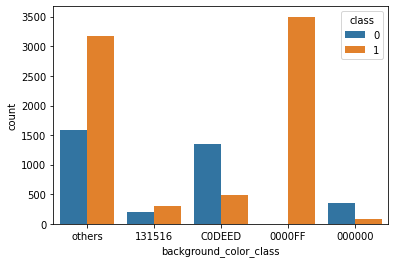

In [47]:
fig_1 = sns.countplot(x = 'background_color_class', data = df_model, hue = 'class')

In [47]:
print(df['profile_text_color'].value_counts())

333333    6992
0         1013
000000     517
666666     302
3D1957     215
          ... 
D421B8       1
5CEDAC       1
0C0CF0       1
0A0909       1
F508F5       1
Name: profile_text_color, Length: 406, dtype: int64


In [ ]:
### Need to change variable encoding for 0  and 000000, since 0 represents missing value and is category in itself

In [48]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["profile_text_color"] == '333333', "text_color_class"] = "333333"
df.loc[np.logical_or(df["profile_text_color"] == '0',df["profile_text_color"] == '000000') , "text_color_class"] = "000000"
df.loc[df["profile_text_color"] == '3D1957', "text_color_class"] = "3"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

In [49]:
df['text_color_class'] = df['text_color_class'].fillna("other")

In [50]:
df['text_color_class'].value_counts()

333333    6992
other     2280
000000    1530
3          215
Name: text_color_class, dtype: int64

In [52]:
df_model['text_color_class'] = df['text_color_class']

<ipython-input-52-039978c986db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['text_color_class'] = df['text_color_class']


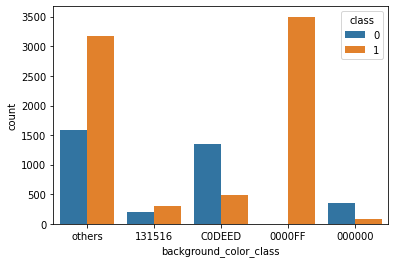

In [51]:
fig_1 = sns.countplot(x = 'background_color_class', data = df_model, hue = 'class')

In [52]:
print(df['profile_sidebar_fill_color'].value_counts())

DDEEF6    5896
407DB0    1012
EFEFEF     479
000000     380
252429     303
          ... 
F0F3F5       1
8CB0B0       1
141212       1
050308       1
F00C0C       1
Name: profile_sidebar_fill_color, Length: 384, dtype: int64


In [53]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["profile_sidebar_fill_color"] == 'DDEEF6', "sidebar_color_class"] = "DDEEF6"
df.loc[np.logical_or(df["profile_sidebar_fill_color"] == '0',df["profile_sidebar_fill_color"] == '000000') , "sidebar_color_class"] = "000000"
df.loc[df["profile_sidebar_fill_color"] == '407DB0', "sidebar_color_class"] = "407DB0"
df.loc[df["profile_sidebar_fill_color"] == 'EFEFEF', "sidebar_color_class"] = "EFEFEF"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

In [54]:
df['sidebar_color_class'] = df['sidebar_color_class'].fillna('others')

In [55]:
df_model['sidebar_color_class'] = df['sidebar_color_class']

<ipython-input-55-4b0baa6aef06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['sidebar_color_class'] = df['sidebar_color_class']


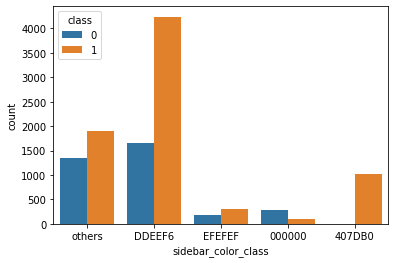

In [56]:
fig_1 = sns.countplot(x = 'sidebar_color_class', data = df_model, hue = 'class')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 11017 non-null  object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [58]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                11017 non-null  int64  
 1   followers_count               11017 non-null  int64  
 2   friends_count                 11017 non-null  int64  
 3   favourites_count              11017 non-null  int64  
 4   listed_count                  11017 non-null  int64  
 5   description_present           11017 non-null  int64  
 6   age                           11017 non-null  int64  
 7   geo_enabled                   11017 non-null  float64
 8   default_profile               11017 non-null  float64
 9   id                            11017 non-null  int64  
 10  url_present                   11017 non-null  object 
 11  class                         11017 non-null  int64  
 12  profile_use_background_image  11017 non-null  float64
 13  b

##### testing for hypothesis that newly created variables have significant impact on the class

In [72]:
### create column with value count of class for the pivot table

In [60]:
df_model['protected'] = df_1['protected']

<ipython-input-60-75937001f691>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['protected'] = df_1['protected']


In [61]:
pivot_df = pd.crosstab(index = df_model['protected'], columns = df_model['class'])

###### Hypothesis: variables 'protected and class are independent'

In [62]:
chi2, p, dof, ex = chi2_contingency(pivot_df, correction=False)
print(chi2, '{:.10f}'.format(p))

170.56684777777724 0.0000000000


###### Hypothesis: variables 'background_color_class and class are independent'

In [63]:
pivot_df = pd.crosstab(index = df_model['background_color_class'], columns = df_model['class'])

chi2, p, dof, ex = chi2_contingency(pivot_df, correction=True)
print(pivot_df)
print(chi2, '{:.10f}'.format(p))

class                      0     1
background_color_class            
000000                   349    78
0000FF                     0  3499
131516                   198   298
C0DEED                  1343   494
others                  1584  3174
3603.603165518076 0.0000000000


#### One hot encoding for selected variables

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 11017 non-null  object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [3]:
### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
list = [['default_profile', 'default_profile_image', 'protected', 'verified', 'class']]
for i in list:
    df[i] = df[i].astype('category')

### Exploratory Data Analysis on raw data for feature selection and data development

In [ ]:
df.info()

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()

In [ ]:
corrMatrix = df.corr()
sns.set(rc = {'figure.figsize':(10, 10)} )
sns.set(font_scale = 2)
sns.heatmap(corrMatrix, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), square = True, cbar_kws = {'shrink': 0.6}, annot = True)
plt.show

In [ ]:
df.info()

In [ ]:
list = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']
for i in list:
    fig = plt.figure(figsize =(7, 7)) 
    # Creating axes instance 
    ax = fig.add_axes([1, 1, 1, 1]) 
    #change of origin by adding 1 to the original data 
    ax.boxplot(np.log(df[i] + 1 ))
        


In [ ]:
list = {'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count'}
for i in list:
    fig, ax = plt.subplots(1)
    sns.histplot(df[i]+1, bins = 100, log_scale= True, kde = True)
    #np.log(df[i]+1).plot.hist(bins = 100)


In [ ]:
from scipy import stats

In [ ]:
type(df['statuses_count'])

In [ ]:
#look for details
crim_boxcox = stats.boxcox(df['statuses_count']+1)[0]

In [ ]:
sn.histplot(data = crim_boxcox, bins = 200, kde = True)

In [ ]:
pd.crosstab(df['verified'], df['protected'])

In [ ]:
pd.crosstab(df['default_profile'], df['protected'])

In [ ]:
pd.crosstab(df['default_profile'], df['protected'])

In [ ]:
pd.crosstab(df['default_profile'], df['default_profile_image'])

In [ ]:
pd.crosstab(df['class'], df['verified'])

In [ ]:
pd.crosstab(df['class'], df['protected'], margins = True)

In [ ]:
pd.crosstab(df['protected'], df['verified'], margins = True)

In [ ]:
pd.crosstab(df['verified'], df['class'], margins = True)

In [ ]:
plt.clf()

In [ ]:
plt.clf()
cross = pd.crosstab(index = [df['verified'], df['protected'], df['default_profile'], df['default_profile_image']], columns = df['class'])
plt.subplots(figsize=(10,10))
plt.tick_params(labelsize = 10)
sns.heatmap(cross, cmap = 'YlOrBr', cbar_kws = {'shrink': 0.8})
cross

In [ ]:
df_bar = df[['verified', 'protected', 'class', 'default_profile', 'default_profile_image']]

fig_1 = sns.countplot(x = 'protected', data = df_bar, hue = 'class')
fig_2 = sns.countplot(x = 'default_profile', data = df_bar)
plt.show()

In [ ]:
plt.close()

In [ ]:
gc.collect()

In [ ]:
df_p

In [ ]:
df_pairplot = df[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'class']]

In [ ]:
df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
df_pairplot['friends_count'] = np.log(df_pairplot['friends_count']+1)
df_pairplot['favourites_count'] = np.log(df_pairplot['favourites_count']+1)
df_pairplot['listed_count'] = np.log(df_pairplot['listed_count']+1)

In [ ]:
sns.pairplot(df_pairplot)

In [ ]:
plt.close()

In [ ]:
sns.pairplot(df_pairplot, hue = 'class')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log(df['followers_count']+1), np.log(df['listed_count']+1), np.log(df['favourites_count']+1), c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
fig = px.scatter_3d(df, x=np.log(df['statuses_count']+1), y=np.log(df['followers_count']+1), z=np.log(df['listed_count']+1),color=df['Category'],labels= True)
fig.show()

In [ ]:
fig_5 = sm.qqplot(np.log(df['favourites_count']+1), line = '45')
fig_4 = sm.qqplot(np.log(df['listed_count']+1), line = '45')
fig_3 = sm.qqplot(np.log(df['followers_count']+1), line = '45')
fig_2 = sm.qqplot(np.log(df['statuses_count']+1), line = '45')
fig_1 = sm.qqplot(np.log(df['friends_count']+1), line = '45')
plt.show()

In [ ]:
plt.scatter(np.log(df['followers_count']+1), np.log(df['friends_count']+1))